# Exercise Set 10

Due: **9:30 20 June 2022**

Discussion: **13:00 24 June 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

In [247]:
import numpy as np 
import pandas as pd 
import astropy
import astropy.constants as const 
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
import scipy
import scipy.integrate
import math
matplotlib.rcParams['figure.dpi']=300
matplotlib.rcParams['figure.figsize']=(4,3)

# 1. Maximum Likelihood analysis [100 points]

## Flux density measurements

In this exercise we repeat an example from the lecture and  extend it: **Flux density measurements** (Lecture Note 11 p. 17).

Like in the lecture we suppose that we have flux density measurements at the frequencies,

  $$ f_i\ \in\ \big(0.4,\ 1.4,\ 2.7,\ 5,\ 10\big) \ \mathrm{GHz}, $$
  
with corresponding measured flux densities,

  $$ 1.855,\ 0.640,\ 0.444,\ 0.22,\ 0.102\ \mathrm{flux\ units}. $$

Let the frequencies be $f_i$ and the data $S_i$. The measurements follow a power-law slope of $-1$, on top of which a $10\%$ Gaussian noise level is added. The noise level is denoted $\epsilon$ and the model for the flux density as a function of frequency is $kf^{-\gamma}$. Assuming we know the noise level and distribution, each term in the likelihood product is of the form:

$$ 
\frac{1}{\sqrt{2\pi}\epsilon{}k{}f_i^{-\gamma}} \mathrm{exp} \Big( - \frac{(S_i-k{}f_i^{-\gamma})^2)}{2(\epsilon{}k{}f_i^{-\gamma})^2} 
\Big)
$$

We are therefore fitting Gaussians to the errors.

In [248]:
#frequencies and fluxes
fi=np.array([0.4,1.4,2.7,5,10]) #Giga-Hertz
si=np.array([1.855, 0.640, 0.444, 0.22, 0.102])  #flux units
alpha=-1 #spectral index

**a)** Plot the measured spectrum on a log-log scale. **10 points**

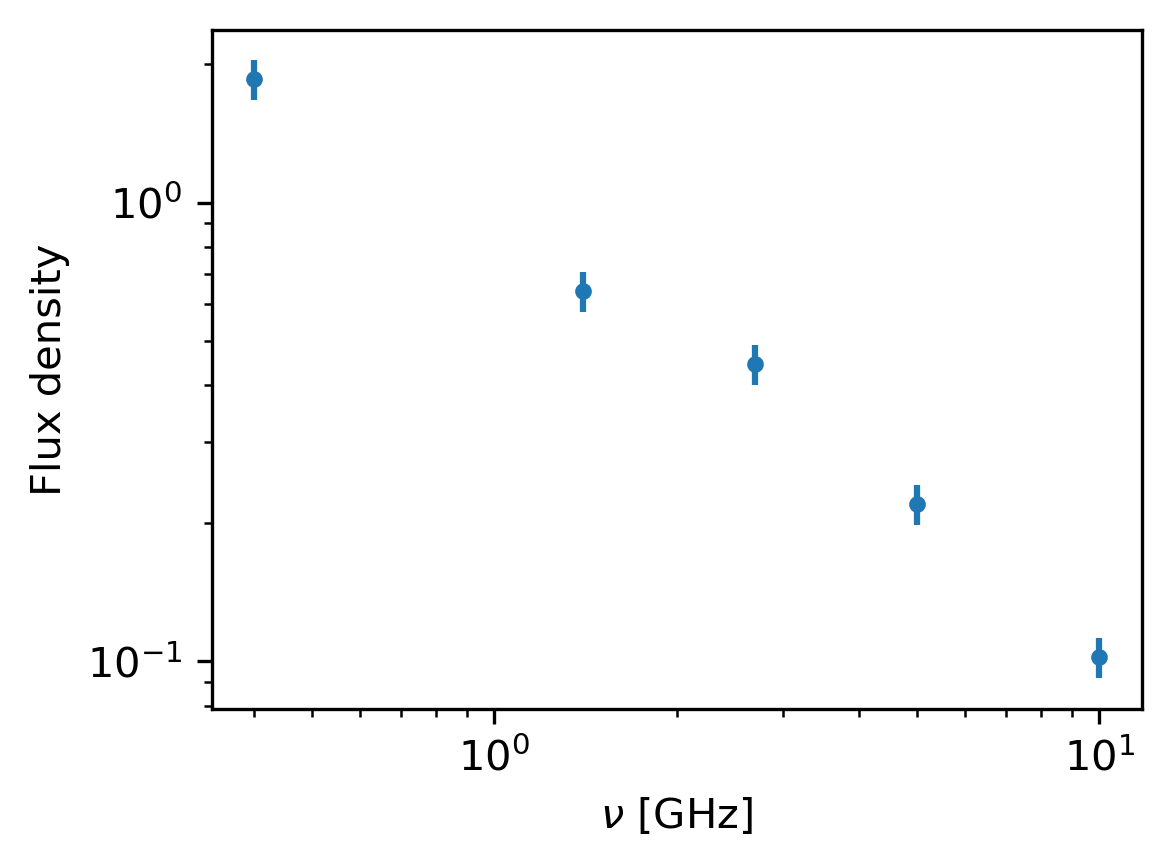

In [249]:
plt.errorbar(fi,si,si*0.1,fmt='.')
plt.xlabel(r"$\nu$ [GHz]")
plt.ylabel(r"Flux density")
plt.yscale("log")
plt.xscale("log")
plt.savefig("plots/fig_a.png",dpi=300,bbox_inches="tight")

**b)** Compute the logarithmic likelihood for a range of $k$ and $\gamma$ values in the range of the maximum likelihood. Normalize the likelihood. Produce a 2-D plot of the logarithmic likelihood for each calculated pair of $k$ and $\gamma$. **20 points**

In [250]:
N=2000 #Number of ks and gammas
kmin,kmax=0.1,2
ks=np.linspace(kmin,kmax,N)
gammas=np.linspace(kmin,kmax,N)
noise=0.1

#Function to compute the log likelihood function for a given k,gamma and noise level.
def log_like_prod(k,gamma,si,fi,epsilon):
    sum=0.0
    for i in range(len(si)):
        s=si[i]
        f=fi[i]
        temp=k*(f**(-1.0*gamma))
        pre=((np.sqrt(2*np.pi)*epsilon*temp))
        exp_term=((-(s-temp)**2)/(2*(epsilon*temp)**2))
        #print(i,"/n",pre,"\n",exp_term)
        sum+=(exp_term-np.log(pre))
    return sum

def like_prod(k,gamma,si,fi,epsilon):
    prod=1.0
    for i in range(len(si)):
        s=si[i]
        f=fi[i]
        temp=k*(f**(-1.0*gamma))
        pre=((np.sqrt(2*np.pi)*epsilon*temp))
        exp_term=((-(s-temp)**2)/(2*(epsilon*temp)**2))
        prod*=(np.exp(exp_term)/pre)
    return prod

#Function re-ordered for integrating over gamma
def like_prod2(gamma,k,si,fi,epsilon):
    prod=1.0
    for i in range(len(si)):
        s=si[i]
        f=fi[i]
        temp=k*(f**(-1.0*gamma))
        pre=((np.sqrt(2*np.pi)*epsilon*temp))
        exp_term=((-(s-temp)**2)/(2*(epsilon*temp)**2))
        prod*=(np.exp(exp_term)/pre)
    return prod
    
#normalization
norm,norm_err=scipy.integrate.dblquad(like_prod, kmin,kmax,kmin,kmax, args=(si,fi,noise))

<ipython-input-251-d855408caa53>:3: RuntimeWarning: invalid value encountered in log
  z=np.log(result/norm)


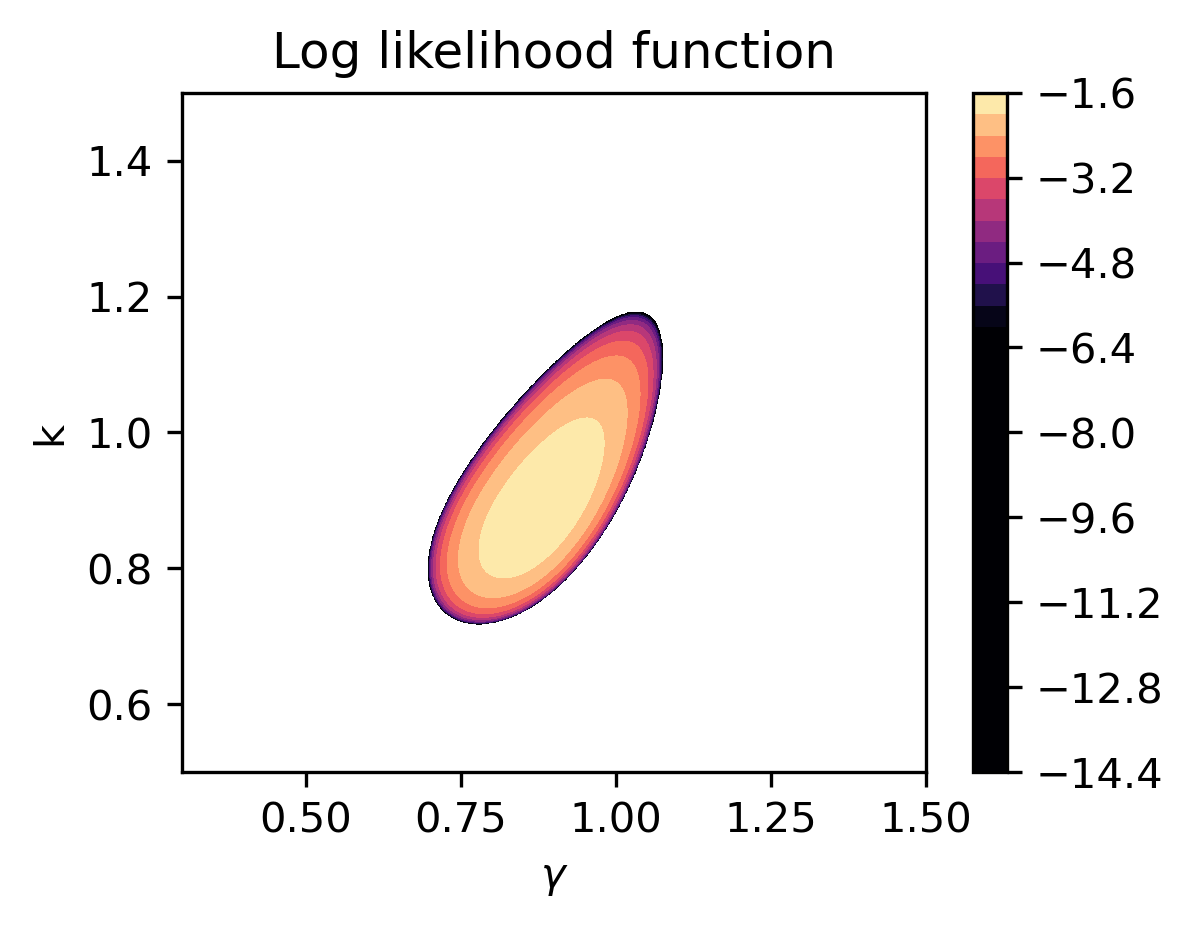

In [251]:
x,y=(np.meshgrid(ks,gammas))
result=log_like_prod(x,y,si,fi,noise)
z=np.log(result/norm)

plt.contourf(y,x,z,cmap='magma',levels=30,vmin=-6)
plt.xlabel(r"$\gamma$")
plt.ylabel(r"k")
plt.colorbar()
plt.xlim(0.3,1.5)
plt.ylim(0.5,1.5)
#plt.yscale("log")
#plt.xscale("log")
plt.title("Log likelihood function")
plt.savefig("plots/fig_b.png",dpi=300,bbox_inches="tight")

**c)** Now look at the probability of one parameter independent of the other parameter. This is called marginalization. In other words we have the posterior probability $\mathcal{P}_r(k,\gamma|S_i)$ and can form:

$$\mathcal{P}_r(k|S_i) = \int{\mathcal{P}_r(k,\gamma|S_i) d\gamma}$$

Compute the marginal probability distributions for $k$ and $\gamma$ and plot them individually. **20 points**

In [252]:
#marginal probability of k
k_mp=[]
for i in range(len(gammas)):
    gamma=gammas[i]
    k_mp.append(scipy.integrate.quad(like_prod,0.3,1.5,args=(gamma,si,fi,noise))[0]/norm)
#marginal probability of gamma
gamma_mp=[]
for i in range(len(ks)):
    k=ks[i]
    gamma_mp.append(scipy.integrate.quad(like_prod2,0.3,1.5,args=(k,si,fi,noise))[0]/norm )   



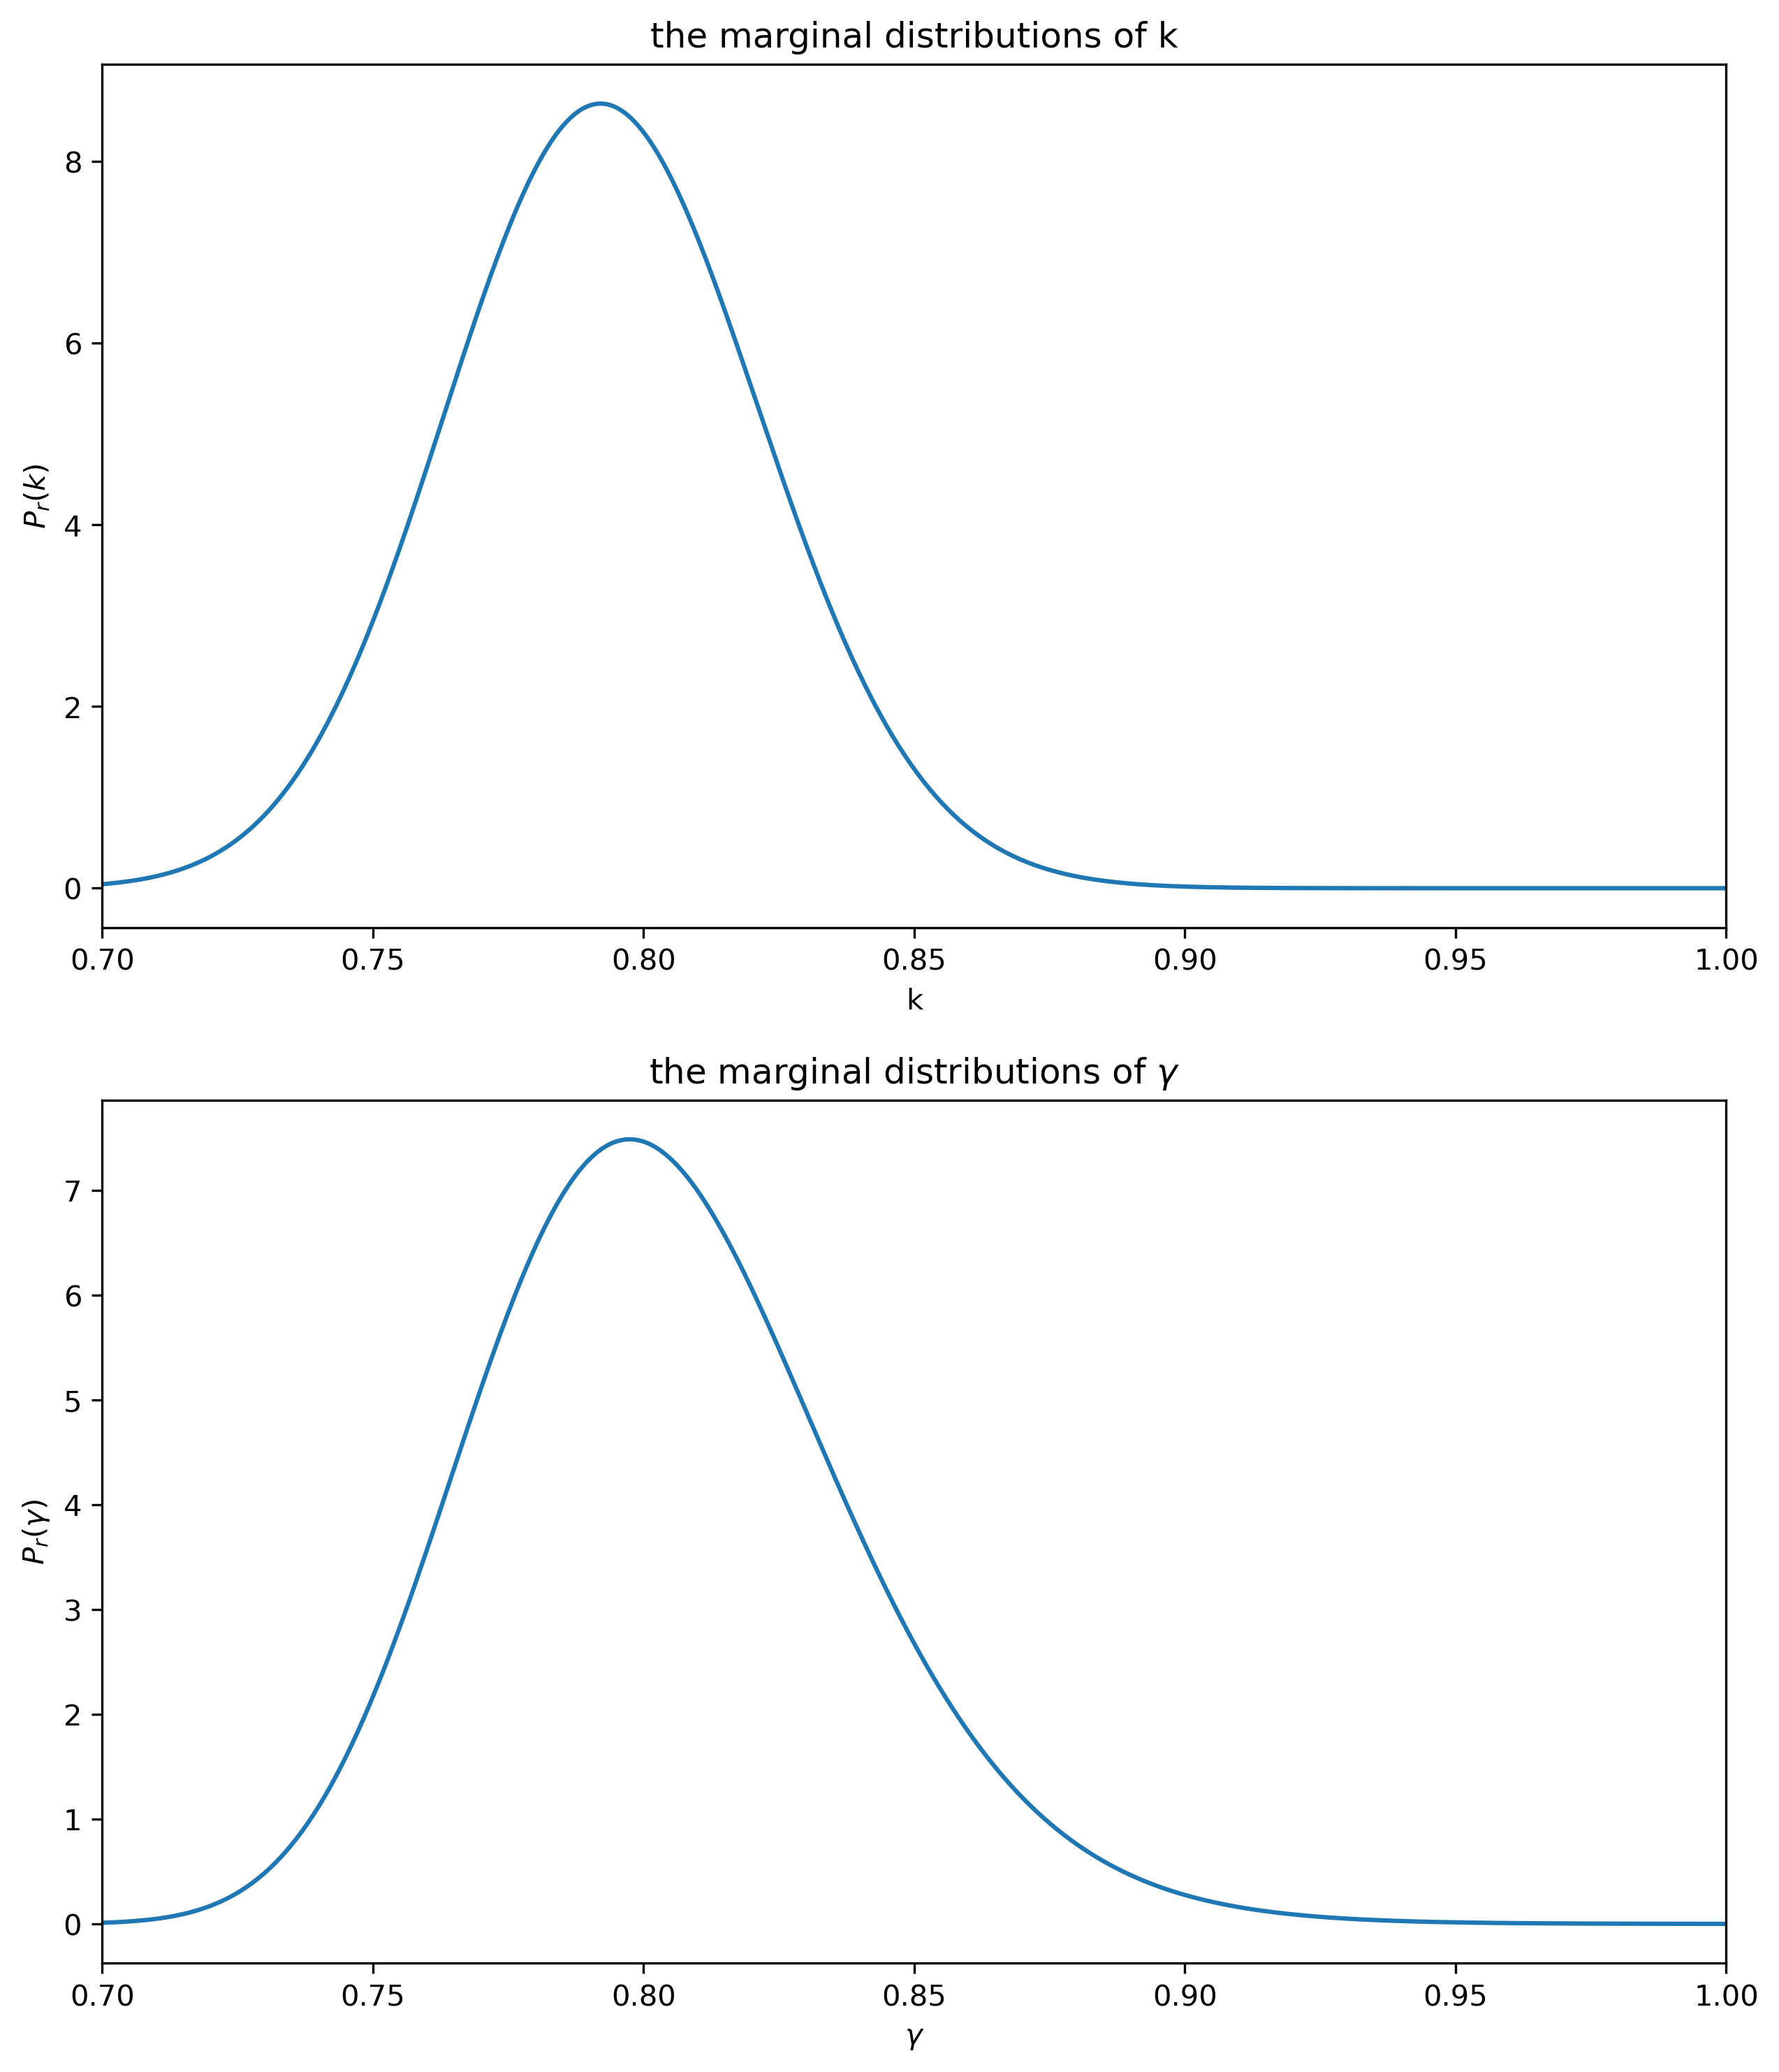

In [253]:
ks2=np.linspace(0.3,1.5,len(ks))
gammas2=np.linspace(0.3,1.5,len(gammas))
fig, axs = plt.subplots(2, 1,figsize=(10, 12))
axs[0].plot(ks2,k_mp)
axs[0].set_xlabel(r"k")
axs[0].set_ylabel(r"$P_r(k)$")
axs[1].plot(gammas2,gamma_mp)
axs[1].set_xlabel(r"$\gamma$")
axs[1].set_ylabel(r"$P_r(\gamma)$")
axs[0].set_title(r"the marginal distributions of k")
axs[1].set_title(r"the marginal distributions of $\gamma$")
axs[0].set_xlim(0.7,1.0)
axs[1].set_xlim(0.7,1.0)
plt.savefig("plots/marginal.png",dpi=300,bbox_inches="tight")

**d)** Add an *artificial* 0.4 flux units to the flux measurements, then use it to calculate two models: 

 - Model A is the same as above with no offsets. 

 - Model B uses a model for the flux densities of the form of $\beta+kf^{-\gamma}$. Thus each likelihood term is:

$$
\frac{1}{\sqrt{2\pi}\epsilon{}k{}f_i^{-\gamma}} \mathrm{exp} \Big( - \frac{(S_i-(\beta + k{}f_i^{-\gamma}))^2}{2(\epsilon{}k{}f_i^{-\gamma})^2} 
\Big)
$$

Plot the contours of the computed logarithmic likelihoods for each Model into the same plot. Compare both models with each other. Which one gives better results? Explain why. **30 points**

In [254]:
def model_b(beta,k,gamma,si,fi,epsilon):
    sum=0.0
    for i in range(len(si)):
        s=si[i]
        f=fi[i]
        temp=beta+(k*(f**(-1.0*gamma)))
        pre=((np.sqrt(2*np.pi)*epsilon*temp))
        exp_term=((-(s-temp)**2)/(2*(epsilon*temp)**2))
        sum+=-(exp_term-np.log(pre))
    return sum

def like_prod_b(k,gamma,si,fi,epsilon,beta):
    prod=1.0
    for i in range(len(si)):
        s=si[i]
        f=fi[i]
        temp=beta+k*(f**(-1.0*gamma))
        pre=((np.sqrt(2*np.pi)*epsilon*temp))
        exp_term=((-(s-temp)**2)/(2*(epsilon*temp)**2))
        prod*=(np.exp(exp_term)/pre)
    return prod

def like_prod_b2(gamma,k,si,fi,epsilon,beta):
    prod=1.0
    for i in range(len(si)):
        s=si[i]
        f=fi[i]
        temp=beta+k*(f**(-1.0*gamma))
        pre=((np.sqrt(2*np.pi)*epsilon*temp))
        exp_term=((-(s-temp)**2)/(2*(epsilon*temp)**2))
        prod*=(np.exp(exp_term)/pre)
    return prod

def like_prod_b3(beta,gamma,k,si,fi,epsilon):
    prod=1.0
    for i in range(len(si)):
        s=si[i]
        f=fi[i]
        temp=beta+k*(f**(-1.0*gamma))
        pre=((np.sqrt(2*np.pi)*epsilon*temp))
        exp_term=((-(s-temp)**2)/(2*(epsilon*temp)**2))
        prod*=(np.exp(exp_term)/pre)
    return prod
    
norm2,norm_err2=scipy.integrate.dblquad(like_prod_b, kmin,kmax,kmin,kmax, args=(si,fi,noise,0.4))

<ipython-input-255-ab85afd47593>:3: RuntimeWarning: invalid value encountered in log
  z=np.log(result/norm)


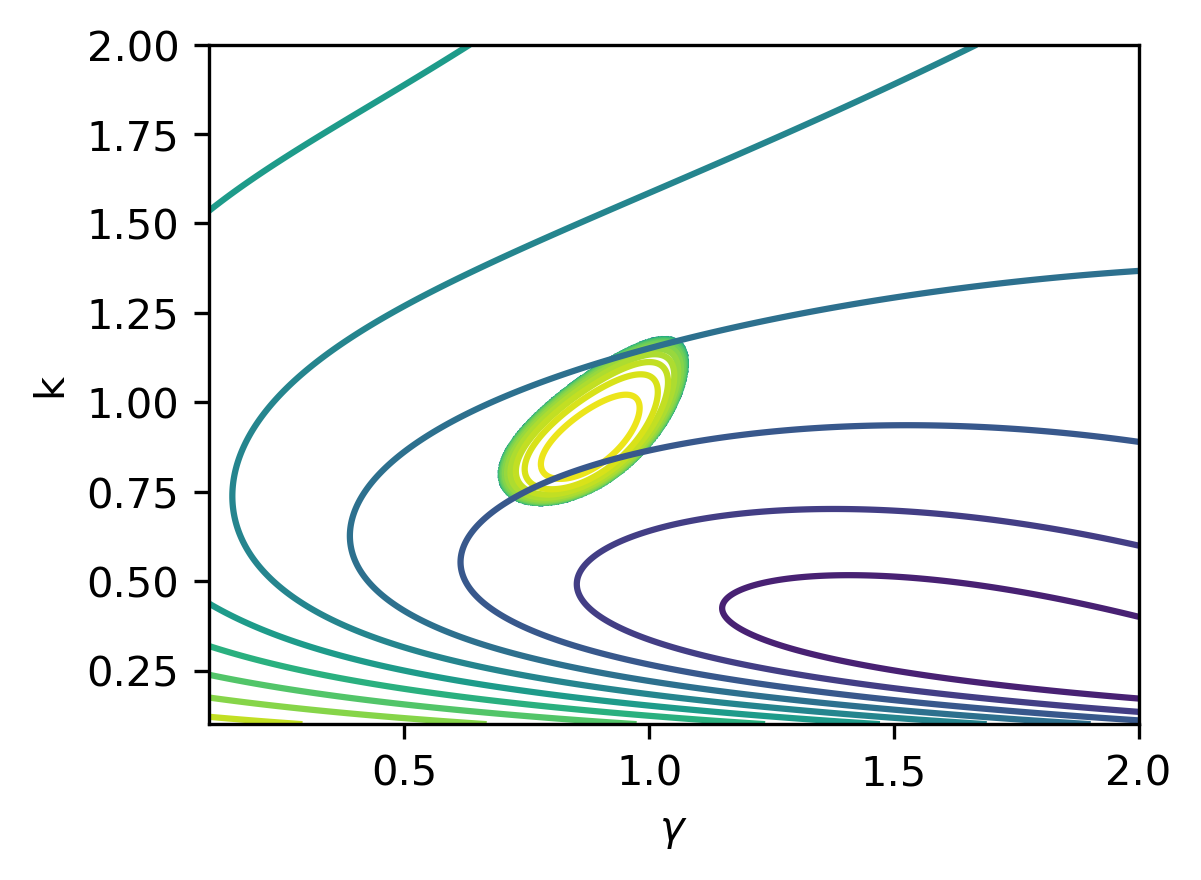

In [255]:
x,y=(np.meshgrid(ks,gammas))
result=log_like_prod(x,y,si,fi,noise)
z=np.log(result/norm)

result2=(model_b(0.4,x,y,si,fi,noise))
z2=np.log(result2/norm2)

plt.contour(y,x,z,levels=30)
plt.contour(y,x,z2,levels=10)
plt.xlabel(r"$\gamma$")
plt.ylabel(r"k")
#plt.xlim(0.3,1.5)
#plt.ylim(0.5,1.5)
plt.savefig("plots/fig_modelb.png",dpi=300,bbox_inches="tight")

**e)** Compute the marginal probability distributions for Model B for the three parameters: $\beta$, $\gamma$, and $k$ and plot them. **20 points**

In [256]:
#marginal probability of k for model b
k_mp=[]
for i in range(len(gammas)):
    gamma=gammas[i]
    k_mp.append(scipy.integrate.quad(like_prod_b,0.3,1.5,args=(gamma,si,fi,noise))[0]/norm2 )
#marginal probability of gamma model b
gamma_mp=[]
for i in range(len(ks)):
    k=ks[i]
    gamma_mp.append(scipy.integrate.quad(like_prod_b2,0.3,1.5,args=(k,si,fi,noise))[0]/norm2 )

#marginal probability of beta model b
beta_mp=[]

TypeError: like_prod_b() missing 1 required positional argument: 'beta'